In [43]:
!pip install cmapPy

In [173]:
import numpy as np
import pandas as pd
import cmapPy.pandasGEXpress.parse as cmapPandas
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [174]:
!unzip data_analyst_intern-20201121T181639Z-001.zip

Archive:  data_analyst_intern-20201121T181639Z-001.zip
replace data_analyst_intern/type1_IFN.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [175]:
data_path = "./data_analyst_intern/PAAD.gct"

In [176]:
#gct file contains col meta data and row meta data
dataset = cmapPandas.parse(data_path)
row_meta_data = dataset.row_metadata_df
col_meta_data = dataset.col_metadata_df
data = dataset.data_df

In [177]:
#dataset info
row_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18465 entries, SLC35E2 to psiTPTE22
Empty DataFrame

In [178]:
col_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
Columns: 124 entries, participant_id to year_of_tobacco_smoking_onset
dtypes: float64(49), int64(10), object(65)
memory usage: 183.7+ KB


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18465 entries, SLC35E2 to psiTPTE22
Columns: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
dtypes: float32(183)
memory usage: 13.7+ MB


In [180]:
row_meta_data.head()

rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1


In [181]:
col_meta_data.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,b_symptoms,bcr,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,clinical_m,clinical_n,clinical_stage,clinical_t,course_number,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,days_to_psa,disease_code,drugs,...,person_neoplasm_cancer_status,prescribed_dose,prescribed_dose_units,primary_lymph_node_presentation_assessment,primary_pattern,primary_therapy_outcome_success,progression_determined_by-3,project_code,psa_value,race,radiation_therapy,radiation_type_notes,radiations,regimen_number,relative_cancer_type-2,relative_cancer_type,residual_tumor,route_of_administration,secondary_pattern,serum_markers,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tertiary_pattern,therapy_type_notes,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,65,yes,weekly drinker,1.0,head of pancreas,NaN,NaN,nationwide children's hospital,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-23962,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,1988.0,whipple,7,yes,NaN,NaN,no,yes,2j,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,48,no,NaN,NaN,other (please specify),body & tail of pancreas,NaN,nationwide children's hospital,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,NaN,NaN,NaN,tcga-2j-aab4-f62444,ce0b8128-82b9-4164-808f-1b4447134f54,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-17794,NaN,0.0,0.0,-292.0,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,complete remission/response,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,NaN,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,75,no,NaN,NaN,body of pancreas,NaN,NaN,nationwide children's hospital,c850368e-6e95-4879-8245-205ddeec6fbd,NaN,NaN,NaN,NaN,NaN,canonical,NaN,NaN,NaN,NaN,NaN,21,5,-27600,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,with tumor,NaN,NaN,yes,NaN,progressive disease,NaN,tcga,NaN,white,no,NaN,NaN,NaN,NaN,NaN,r0,NaN,NaN,NaN,medical record,NaN,distal pancreatectomy,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,71,no,NaN,NaN,head of pancreas,NaN,NaN,nationwide children's hospital,5749429c-5ac9-40de-b44e-3b795520ec07,NaN,NaN,NaN,tcga-2j-aab8-f62434,daf7d897-0ed7-48ec-ae70-080dd8d7d6bd,canonical,NaN,NaN,NaN,NaN,NaN,21,16,-26028,NaN,0.0,0.0,NaN,NaN,paad,NaN,...,tumor free,NaN,NaN,yes,NaN,NaN,NaN,tcga,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,r1,NaN,NaN,NaN,NaN,NaN,whipple,7,yes,NaN,NaN,no,yes,2j,NaN,NaN,NaN,panc

In [182]:
data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,8.35,6.4,8.25,8.55,7.5,7.65,7.45,8.1,8.7,8.0,7.5,9.95,8.7,8.05,7.65,7.65,7.85,8.05,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,10.00,7.3,6.10,7.20,6.5,7.10,6.50,9.3,9.5,9.7,8.6,8.00,8.5,6.20,9.00,6.70,5.30,5.10,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,6.9,4.60,NaN,6.20,4.5,3.1,5.7,5.30,1.2,4.7,4.20,5.2,5.60,7.5,7.40,5.20,5.6,1.30,2.10,6.9,7.2,6.6,8.3,7.00,8.5,3.10,8.20,5.20,2.70,2.20,...,4.5,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.90,7.00,6.0,4.20,5.4,5.3,1.1,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.8,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,1.6,0.70,-0.9,0.30,1.3,NaN,NaN,NaN,-0.1,1.3,NaN,NaN,NaN,0.3,1.10,1.50,NaN,1.00,-0.40,3.6,NaN,-0.8,-1.0,NaN,NaN,0.40,NaN,-1.30,NaN,NaN,...,NaN,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,NaN,0.00,-0.1,NaN,NaN,NaN,NaN,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0.90,NaN,6.60,0.6,0.4,-1.10,-0.70,1.0,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,6.60,7.7,7.10,7.50,6.0,6.50,7.30,6.3,6.7,5.5,6.4,5.50,3.8,6.60,4.40,7.00,6.80,6.80,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


In [184]:
col_meta_data.shape

(183, 124)

In [185]:
#As we can see there are a lot of columns in the col_meta_data part
#As if columns contains constant values that is of no use we need to find if there are any columns that contains contant values we can drop them and not take them into consideration

In [186]:
def findUniqueCols(data):
  arr = []
  for col in data.columns:
    if len(data[col].unique())<2:
      arr.append(col)
  print("Number of columns with constant values "+str(len(arr)))
  return arr

In [187]:
def dropConstCols(data):
  col_list = findUniqueCols(data)
  data = data.drop(col_list,axis=1)
  return data

In [188]:
#give some showcase
#drop columns which have unique values
col_meta_data = dropConstCols(col_meta_data)

Number of columns with constant values 41


In [189]:
col_meta_data.shape

(183, 83)

In [190]:
#rid gives us the types of RNA sequence
row_meta_data.shape

(18465, 0)

In [191]:
#there are 18465 types of rna sequence

In [192]:
def findMissingVals(data):
  missing_val_count = data.isnull().sum().sum()
  print("Total missing Values in data "+str(missing_val_count))

In [193]:
findMissingVals(data)

Total missing Values in data 134954


In [194]:
#there are a lot of missing values we need to replace these value for good results

In [195]:
def replaceMissingValues(data):
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer()
  imputed_data = pd.DataFrame(imputer.fit_transform(data))
  imputed_data.columns = data.columns
  imputed_data.index = data.index
  return imputed_data

In [196]:
imputed_data = replaceMissingValues(data)

In [197]:
#set the participent id

In [198]:
imputed_data = imputed_data.rename(columns=col_meta_data.participant_id).T
imputed_data.head()

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZP3,ZPBP2,ZPLD1,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,9.4,-1.000000,10.2,9.2,4.8,10.2,9.6,11.8,7.600244,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.000000,7.8,10.4,9.7,1.0,8.1,7.9,9.3,...,7.7,7.600244,3.9,9.4,9.4,5.5,8.1,4.0,7.2,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5
aab4,8.10,5.8,5.7,1.100000,6.8,7.639954,14.0,10.2,5.6,-1.200000,9.1,-0.200000,10.3,5.0,6.3,10.4,9.8,11.4,0.300000,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.000000,8.5,10.9,9.5,0.8,9.0,6.0,9.7,...,6.6,7.639954,5.7,9.6,10.2,5.4,7.9,5.0,7.0,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5
aab6,7.20,6.4,3.0,7.577068,7.3,10.800000,13.1,10.1,0.2,0.200000,9.7,7.577068,9.2,2.8,5.9,9.9,9.8,11.1,2.200000,8.4,8.8,11.4,9.3,6.7,7.3,10.3,7.3,8.4,4.7,6.1,7.4,8.0,1.800000,9.2,10.6,8.0,4.1,7.7,5.7,10.4,...,7.8,7.577068,3.0,9.5,10.4,4.9,7.8,5.2,6.6,5.4,9.9,2.9,6.3,7.7,6.6,2.4,7.9,6.9,2.0,5.7,0.8,8.2,5.7,8.8,5.3,8.7,7.3,7.0,8.8,8.4,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7
aab8,8.00,5.8,5.1,7.728812,7.5,4.100000,13.8,8.6,3.2,-0.100000,9.6,-0.100000,9.4,7.7,6.4,10.5,9.2,11.6,-0.100000,8.7,9.1,11.4,9.4,7.7,7.8,10.1,8.3,8.4,5.4,6.6,7.3,7.1,7.728812,9.0,10.0,7.9,5.2,7.6,6.7,10.4,...,6.6,7.728812,0.9,9.7,10.6,5.7,8.0,6.0,7.6,6.5,9.2,0.9,5.9,7.1,6.8,4.0,8.9,7.4,4.2,6.1,2.5,8.0,6.1,9.8,6.3,8.8,8.0,7.4,8.6,8.6,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4
aab9,7.65,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796027,9.8,7.796027,9.3,7.0,6.5,10.1,9.8,11.2,0.100000,8.4,9.3,11.4,9.4,7.2,8.3,10.3,8.6,9.4,5.9,6.2,6.1,6.0,1.700000,8.7,10.0,9.3,3.3,8.8,7.7,9.2,...,8.1,0.100000,4.9,9.7,9.7,4.8,8.1,5.1,7.3,6.2,10.1,2.4,5.7,7.9,7.0,4.3,8.6,8.0,1.7,6.1,0.1,8.4,7.0,9.9,6.9,8.6,8.0,7.0,8.9,8.2,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9


In [199]:
#now lets merge both the data to get a final dataset

In [200]:
cols_merge = ['sample_type', 'mRNAseq_cluster','adenocarcinoma_invasion', 'vital_status', 'maximum_tumor_dimension', 'pathologic_stage', 'pathologic_m', 'pathologic_n', 'pathologic_t']

In [201]:
col_meta_data = col_meta_data.set_index('participant_id')
for cols in cols_merge:
  imputed_data[cols] = col_meta_data[cols]

In [202]:
imputed_data.head()

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,9.4,-1.000000,10.2,9.2,4.8,10.2,9.6,11.8,7.600244,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.000000,7.8,10.4,9.7,1.0,8.1,7.9,9.3,...,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5,Primary solid Tumor,1.0,yes,dead,4.5,stage iib,m0,n1,t3
aab4,8.10,5.8,5.7,1.100000,6.8,7.639954,14.0,10.2,5.6,-1.200000,9.1,-0.200000,10.3,5.0,6.3,10.4,9.8,11.4,0.300000,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.000000,8.5,10.9,9.5,0.8,9.0,6.0,9.7,...,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5,Primary solid Tumor,2.0,yes,alive,6.8,stage iib,m0,n1,t2
aab6,7.20,6.4,3.0,7.577068,7.3,10.800000,13.1,10.1,0.2,0.200000,9.7,7.577068,9.2,2.8,5.9,9.9,9.8,11.1,2.200000,8.4,8.8,11.4,9.3,6.7,7.3,10.3,7.3,8.4,4.7,6.1,7.4,8.0,1.800000,9.2,10.6,8.0,4.1,7.7,5.7,10.4,...,5.4,9.9,2.9,6.3,7.7,6.6,2.4,7.9,6.9,2.0,5.7,0.8,8.2,5.7,8.8,5.3,8.7,7.3,7.0,8.8,8.4,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7,Primary solid Tumor,3.0,yes,dead,5.0,stage iia,m0,n0,t3
aab8,8.00,5.8,5.1,7.728812,7.5,4.100000,13.8,8.6,3.2,-0.100000,9.6,-0.100000,9.4,7.7,6.4,10.5,9.2,11.6,-0.100000,8.7,9.1,11.4,9.4,7.7,7.8,10.1,8.3,8.4,5.4,6.6,7.3,7.1,7.728812,9.0,10.0,7.9,5.2,7.6,6.7,10.4,...,6.5,9.2,0.9,5.9,7.1,6.8,4.0,8.9,7.4,4.2,6.1,2.5,8.0,6.1,9.8,6.3,8.8,8.0,7.4,8.6,8.6,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4,Primary solid Tumor,1.0,yes,alive,3.5,stage iib,m0,n1,t3
aab9,7.65,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796027,9.8,7.796027,9.3,7.0,6.5,10.1,9.8,11.2,0.100000,8.4,9.3,11.4,9.4,7.2,8.3,10.3,8.6,9.4,5.9,6.2,6.1,6.0,1.700000,8.7,10.0,9.3,3.3,8.8,7.7,9.2,...,6.2,10.1,2.4,5.7,7.9,7.0,4.3,8.6,8.0,1.7,6.1,0.1,8.4,7.0,9.9,6.9,8.6,8.0,7.0,8.9,8.2,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9,Primary solid Tumor,4.0,yes,dead,4.0,stage iib,m0,n1,t3


In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [204]:
for i in dtypes.iteritems():
  if i[1]=='object':
    col_name = i[0]
    imputed_data[col_name] = imputed_data[col_name].astype('|S')
    imputed_data[col_name] = le.fit_transform(imputed_data[col_name])

In [205]:
imputed_data.head()

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,9.4,-1.000000,10.2,9.2,4.8,10.2,9.6,11.8,7.600244,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.000000,7.8,10.4,9.7,1.0,8.1,7.9,9.3,...,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5,1,1.0,1,1,4.5,5,0,1,3
aab4,8.10,5.8,5.7,1.100000,6.8,7.639954,14.0,10.2,5.6,-1.200000,9.1,-0.200000,10.3,5.0,6.3,10.4,9.8,11.4,0.300000,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.000000,8.5,10.9,9.5,0.8,9.0,6.0,9.7,...,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5,1,2.0,1,0,6.8,5,0,1,2
aab6,7.20,6.4,3.0,7.577068,7.3,10.800000,13.1,10.1,0.2,0.200000,9.7,7.577068,9.2,2.8,5.9,9.9,9.8,11.1,2.200000,8.4,8.8,11.4,9.3,6.7,7.3,10.3,7.3,8.4,4.7,6.1,7.4,8.0,1.800000,9.2,10.6,8.0,4.1,7.7,5.7,10.4,...,5.4,9.9,2.9,6.3,7.7,6.6,2.4,7.9,6.9,2.0,5.7,0.8,8.2,5.7,8.8,5.3,8.7,7.3,7.0,8.8,8.4,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7,1,3.0,1,1,5.0,4,0,0,3
aab8,8.00,5.8,5.1,7.728812,7.5,4.100000,13.8,8.6,3.2,-0.100000,9.6,-0.100000,9.4,7.7,6.4,10.5,9.2,11.6,-0.100000,8.7,9.1,11.4,9.4,7.7,7.8,10.1,8.3,8.4,5.4,6.6,7.3,7.1,7.728812,9.0,10.0,7.9,5.2,7.6,6.7,10.4,...,6.5,9.2,0.9,5.9,7.1,6.8,4.0,8.9,7.4,4.2,6.1,2.5,8.0,6.1,9.8,6.3,8.8,8.0,7.4,8.6,8.6,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4,1,1.0,1,0,3.5,5,0,1,3
aab9,7.65,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796027,9.8,7.796027,9.3,7.0,6.5,10.1,9.8,11.2,0.100000,8.4,9.3,11.4,9.4,7.2,8.3,10.3,8.6,9.4,5.9,6.2,6.1,6.0,1.700000,8.7,10.0,9.3,3.3,8.8,7.7,9.2,...,6.2,10.1,2.4,5.7,7.9,7.0,4.3,8.6,8.0,1.7,6.1,0.1,8.4,7.0,9.9,6.9,8.6,8.0,7.0,8.9,8.2,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9,1,4.0,1,1,4.0,5,0,1,3


In [206]:
#get the varince of the data

In [207]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit_transform(imputed_data.drop(columns=cols_merge))

In [208]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=120)
y = pca.fit_transform(std)

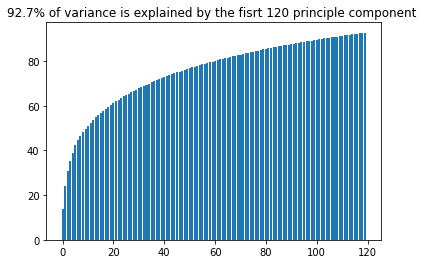

In [209]:
cumulative_variance_ratio = (pca.explained_variance_ratio_.cumsum())*100

explained_variance_ratio = round(pca.explained_variance_ratio_.sum()*100, 2)

plt.bar(range(120), cumulative_variance_ratio, label='Cumulative Sum of Explained Varaince Ratio')
plt.title(f"{explained_variance_ratio}% of variance is explained by the fisrt {120} principle component ");

[]

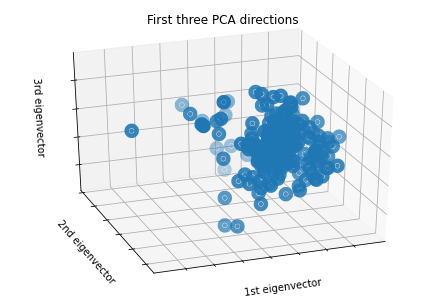

In [210]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_r  = pca.fit_transform(std)
Y=imputed_data['sample_type']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(x_r[:, 0], x_r[:, 1], x_r[:, 2],cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [211]:
#Removal of the neuro encdrocrine ones

In [212]:
#########Fix

In [213]:
imputed_data = imputed_data[imputed_data['adenocarcinoma_invasion']==1]
imputed_data.shape

(182, 18474)

In [214]:
ifn_data = pd.read_csv("./data_analyst_intern/type1_IFN.txt",header=None)

In [215]:
ifn_data.head()

,0
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [216]:
ifn_data.columns = ['ifn_info']

In [217]:
ifn_data.head()

,ifn_info
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [218]:
!pip install gsva

In [219]:
imputed_data.head()

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,9.4,-1.000000,10.2,9.2,4.8,10.2,9.6,11.8,7.600244,8.6,8.9,11.3,8.6,7.5,8.1,10.6,10.0,9.4,4.4,5.8,1.8,7.4,1.000000,7.8,10.4,9.7,1.0,8.1,7.9,9.3,...,6.9,9.1,1.5,6.0,8.0,7.3,3.4,8.7,7.1,0.5,6.0,0.5,8.6,7.1,8.8,8.2,8.8,8.1,7.0,8.6,8.1,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5,1,1.0,1,1,4.5,5,0,1,3
aab4,8.10,5.8,5.7,1.100000,6.8,7.639954,14.0,10.2,5.6,-1.200000,9.1,-0.200000,10.3,5.0,6.3,10.4,9.8,11.4,0.300000,8.4,8.7,11.6,9.0,7.5,8.2,10.2,8.1,9.3,4.9,5.7,6.3,4.9,3.000000,8.5,10.9,9.5,0.8,9.0,6.0,9.7,...,6.1,9.8,3.1,6.0,7.6,6.2,3.7,8.5,7.5,-1.2,5.7,0.8,7.9,6.2,9.2,6.9,9.4,8.1,7.5,8.7,8.1,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5,1,2.0,1,0,6.8,5,0,1,2
aab6,7.20,6.4,3.0,7.577068,7.3,10.800000,13.1,10.1,0.2,0.200000,9.7,7.577068,9.2,2.8,5.9,9.9,9.8,11.1,2.200000,8.4,8.8,11.4,9.3,6.7,7.3,10.3,7.3,8.4,4.7,6.1,7.4,8.0,1.800000,9.2,10.6,8.0,4.1,7.7,5.7,10.4,...,5.4,9.9,2.9,6.3,7.7,6.6,2.4,7.9,6.9,2.0,5.7,0.8,8.2,5.7,8.8,5.3,8.7,7.3,7.0,8.8,8.4,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7,1,3.0,1,1,5.0,4,0,0,3
aab8,8.00,5.8,5.1,7.728812,7.5,4.100000,13.8,8.6,3.2,-0.100000,9.6,-0.100000,9.4,7.7,6.4,10.5,9.2,11.6,-0.100000,8.7,9.1,11.4,9.4,7.7,7.8,10.1,8.3,8.4,5.4,6.6,7.3,7.1,7.728812,9.0,10.0,7.9,5.2,7.6,6.7,10.4,...,6.5,9.2,0.9,5.9,7.1,6.8,4.0,8.9,7.4,4.2,6.1,2.5,8.0,6.1,9.8,6.3,8.8,8.0,7.4,8.6,8.6,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4,1,1.0,1,0,3.5,5,0,1,3
aab9,7.65,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796027,9.8,7.796027,9.3,7.0,6.5,10.1,9.8,11.2,0.100000,8.4,9.3,11.4,9.4,7.2,8.3,10.3,8.6,9.4,5.9,6.2,6.1,6.0,1.700000,8.7,10.0,9.3,3.3,8.8,7.7,9.2,...,6.2,10.1,2.4,5.7,7.9,7.0,4.3,8.6,8.0,1.7,6.1,0.1,8.4,7.0,9.9,6.9,8.6,8.0,7.0,8.9,8.2,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9,1,4.0,1,1,4.0,5,0,1,3


In [220]:
col_meta_data.head()

chd,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,alcohol_history_documented,alcoholic_exposure_category,amount_of_alcohol_consumption_per_day,anatomic_neoplasm_subdivision,anatomic_neoplasm_subdivision_other,bcr_aliquot_uuid,bcr_canonical_reason-2,bcr_canonical_reason-3,bcr_canonical_reason,bcr_followup_barcode,bcr_followup_uuid,bcr_patient_canonical_status,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,days_to_initial_pathologic_diagnosis,days_to_pancreatitis_onset,ethnicity,family_history_of_cancer,file_uuid,followup_case_report_form_submission_reason,followup_treatment_success,frequency_of_alcohol_consumption,gender,histologic_grading_tier_category,histological_type,histological_type_other,history_of_chronic_pancreatitis,history_of_diabetes,history_of_neoadjuvant_treatment,...,icd_o_3_histology,icd_o_3_site,init_pathology_dx_method_other,initial_pathologic_diagnosis_method,lost_follow_up,lymph_node_examined_count,maximum_tumor_dimension,mononucleotide_and_dinucleotide_marker_panel_analysis_status,month_of_form_completion,neoplasm_histologic_grade,number_of_lymphnodes_positive_by_he,number_of_lymphnodes_positive_by_ihc,number_pack_years_smoked,other_dx,pathologic_m,pathologic_n,pathologic_stage,pathologic_t,patient_death_reason,person_neoplasm_cancer_status,primary_lymph_node_presentation_assessment,primary_therapy_outcome_success,progression_determined_by-3,race,radiation_therapy,relative_cancer_type-2,relative_cancer_type,residual_tumor,source_of_patient_death_reason,stopped_smoking_year,surgery_performed_type,system_version,targeted_molecular_therapy,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,yes,65,yes,weekly drinker,1.0,head of pancreas,NaN,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,NaN,NaN,NaN,NaN,NaN,canonical,5,-23962,NaN,0.0,0.0,NaN,NaN,no,cda0d295-ea13-4065-9e5d-8177e827a8f6,NaN,NaN,3.0,male,four tier,pancreas-adenocarcinoma-other subtype,invasive adenocarcinoma,no,no,no,...,8480,c25.0,NaN,tumor resection,NaN,22.0,4.5,mss,7,g3,7.0,0.0,25.0,no,m0,n1,stage iib,t3,pancreatic cancer,tumor free,yes,complete remission/response,NaN,white,no,NaN,NaN,r0,medical record,1988.0,whipple,7,yes,no,yes,2j,3.0,2014,2012.0,1962.0
aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,yes,48,no,NaN,NaN,other (please specify),body & tail of pancreas,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,NaN,NaN,NaN,tcga-2j-aab4-f62444,ce0b8128-82b9-4164-808f-1b4447134f54,canonical,16,-17794,NaN,0.0,0.0,-292.0,NaN,NaN,d25a44b7-47b1-4a1b-ae08-7bd9aceab9c8,scheduled follow-up submission,NaN,NaN,male,four tier,pancreas-adenocarcinoma-other subtype,"invasive, well-differentiated",yes,no,no,...,8140,c25.8,NaN,tumor resection,no,34.0,6.8,mss,7,g2,0.0,0.0,NaN,no,m0,n1,stage iib,t2,NaN,tumor free,yes,complete remission/response,NaN,white,no,NaN,NaN,r0,NaN,NaN,distal pancreatectomy,7,yes,no,yes,2j,5.0,2014,2012.0,NaN
aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,yes,75,no,NaN,NaN,body of pancreas,NaN,c850368e-6e95-4879-8245-205ddeec6fbd,NaN,NaN,NaN,NaN,NaN,canonical,5,-27600,NaN,0.0,0.0,NaN,NaN,NaN,6f72d859-d6af-4a35-8836-2e086684d90f,NaN,NaN,NaN,male,four tier,pancreas-adenocarcinoma ductal type,NaN,no,no,no,...,8500,c25.1,NaN,tumor resection,NaN,18.0,5.0,mss,7,g2,0.0,0.0,NaN,no,m0,n0,stage iia,t3,pancreatic cancer,with tumor,yes,progressive disease,NaN,white,no,NaN,NaN,r0,medical record,NaN,distal pancreatectomy,7,yes,no,yes,2j,NaN,2014,2012.0,NaN
aab8,Primary solid Tumor

In [221]:
data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,8.35,6.4,8.25,8.55,7.5,7.65,7.45,8.1,8.7,8.0,7.5,9.95,8.7,8.05,7.65,7.65,7.85,8.05,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,10.00,7.3,6.10,7.20,6.5,7.10,6.50,9.3,9.5,9.7,8.6,8.00,8.5,6.20,9.00,6.70,5.30,5.10,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,6.9,4.60,NaN,6.20,4.5,3.1,5.7,5.30,1.2,4.7,4.20,5.2,5.60,7.5,7.40,5.20,5.6,1.30,2.10,6.9,7.2,6.6,8.3,7.00,8.5,3.10,8.20,5.20,2.70,2.20,...,4.5,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.90,7.00,6.0,4.20,5.4,5.3,1.1,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.8,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,1.6,0.70,-0.9,0.30,1.3,NaN,NaN,NaN,-0.1,1.3,NaN,NaN,NaN,0.3,1.10,1.50,NaN,1.00,-0.40,3.6,NaN,-0.8,-1.0,NaN,NaN,0.40,NaN,-1.30,NaN,NaN,...,NaN,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,NaN,0.00,-0.1,NaN,NaN,NaN,NaN,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0.90,NaN,6.60,0.6,0.4,-1.10,-0.70,1.0,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,6.60,7.7,7.10,7.50,6.0,6.50,7.30,6.3,6.7,5.5,6.4,5.50,3.8,6.60,4.40,7.00,6.80,6.80,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


In [222]:
new_data = replaceMissingValues(data)

In [223]:
new_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.200000,8.000000,7.65,8.100000,8.200000,8.2,7.55,8.450000,7.5,7.55,7.800000,8.15,8.7,8.000000,6.500000,6.550000,8.1,7.3,7.950000,7.300000,8.350000,6.4,8.25,8.55,7.50000,7.65,7.45,8.1,8.700000,8.0,7.5,9.950000,8.700000,8.05,7.650000,7.65,7.850000,8.050000,...,8.800000,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.650000,7.45,7.7,7.850000,7.700000,7.400000,8.500000,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.50000,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.050000,8.2,7.25,7.4,7.350000,7.2,9.050000
A1BG,6.40,5.8,6.400000,5.800000,6.70,6.600000,6.300000,6.5,5.70,6.300000,6.8,5.90,5.700000,6.70,5.4,5.800000,6.700000,6.000000,7.0,5.7,6.500000,7.800000,10.000000,7.3,6.10,7.20,6.50000,7.10,6.50,9.3,9.500000,9.7,8.6,8.000000,8.500000,6.20,9.000000,6.70,5.300000,5.100000,...,6.800000,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.000000,6.30,6.7,5.200000,8.100000,7.200000,8.100000,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.90000,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.000000,6.9,7.10,7.3,7.900000,6.0,6.900000
A1CF,4.70,5.7,3.000000,5.100000,4.40,4.200000,1.600000,6.8,6.00,7.431307,6.9,4.60,7.467205,6.20,4.5,3.100000,5.700000,5.300000,1.2,4.7,4.200000,5.200000,5.600000,7.5,7.40,5.20,5.60000,1.30,2.10,6.9,7.200000,6.6,8.3,7.000000,8.500000,3.10,8.200000,5.20,2.700000,2.200000,...,4.500000,5.90,2.9,3.10,6.9,6.9,4.6,6.5,-1.2,0.900000,7.00,6.0,4.200000,5.400000,5.300000,1.100000,6.20,5.80,6.7,4.9,7.2,4.4,6.40,4.80000,7.00,6.4,6.0,5.30,5.60,5.4,5.40,6.40,6.5,4.400000,3.3,3.60,6.2,1.200000,4.9,2.000000
A2BP1,-1.00,1.1,7.577068,7.728812,0.10,7.664174,7.628676,1.7,0.40,-1.500000,1.6,0.70,-0.900000,0.30,1.3,7.676605,7.795213,7.470156,-0.1,1.3,7.480417,7.652951,7.569822,0.3,1.10,1.50,7.52819,1.00,-0.40,3.6,7.691588,-0.8,-1.0,7.334601,7.412444,0.40,7.585991,-1.30,7.600843,7.545454,...,7.691609,0.40,-0.1,-1.00,3.7,1.8,-0.3,1.5,-1.2,7.584074,0.00,-0.1,7.564054,7.566644,7.539044,7.633615,-0.50,-0.70,-1.2,0.1,0.7,-1.0,-0

In [231]:
new_data.shape

(18465, 183)

In [232]:
#the data has 18465 genes and 183 samples

In [233]:
#calculating cdf and then ranking

In [238]:
import scipy
def calCDFAndRank(data):
  norm_cdf = scipy.stats.norm.cdf(data.values)
  _,id = np.unique(norm_cdf,return_inverse=True)
  out = (id.max() - id + 1).reshape(norm_cdf.shape)
  return out


In [239]:
for col in new_data:
  new_data[col] = calCDFAndRank(new_data[col])

In [240]:
new_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,10,3,13,4,9,3,2,2,10,1,10,10,6,3,1,4,20,20,3,12,5,12,1,21,2,1,10,8,11,3,1,4,10,1,1,4,8,9,6,4,...,1,2,1,4,1,7,2,1,1,1,11,8,6,7,11,1,14,3,4,6,8,21,1,1,10,10,1,1,5,2,1,5,1,4,2,13,11,12,13,1
A1BG,21,27,21,27,19,19,22,20,29,22,17,27,28,18,31,27,18,26,15,28,21,6,1,12,24,13,20,15,21,1,1,1,1,4,1,24,1,19,33,35,...,17,13,10,7,11,26,7,22,14,25,23,18,34,3,13,3,24,11,19,9,32,22,16,16,39,20,18,33,4,9,14,15,18,16,16,15,12,5,25,16
A1CF,38,28,55,34,42,43,68,17,26,10,16,40,10,23,40,54,28,33,73,38,44,33,29,10,11,33,29,72,65,16,13,19,1,15,1,55,2,34,59,64,...,40,26,56,55,16,16,39,20,92,76,16,25,44,31,32,73,24,27,18,36,13,41,21,37,16,21,25,32,30,31,31,22,20,42,52,50,23,74,36,65
A2BP1,88,72,9,7,80,8,8,68,81,92,68,77,92,82,72,8,7,10,84,72,11,8,9,79,73,69,9,75,88,49,8,86,88,11,10,81,10,89,9,10,...,8,79,82,89,48,67,85,70,92,9,84,81,10,9,9,8,85,90,93,81,78,88,91,8,20,79,80,90,85,74,50,72,87,9,64,66,83,9,65,8
A2LD1,9,17,12,10,12,19,14,17,4,27,14,8,21,20,16,25,2,1,21,14,22,3,19,7,14,10,25,21,13,22,18,30,21,30,47,20,42,16,18,18,...,19,17,17,19,18,23,17,13,32,12,2,8,20,4,10,16,22,15,18,12,9,17,15,14,19,11,14,11,18,24,20,13,24,19,20,19,18,21,16,18
